In [64]:
import tensorflow as tf
import torch

In [3]:
from roboflow import Roboflow
rf=Roboflow(api_key="9U7LpeqmjKg4frtGxhO2")
project=rf.workspace("sudhanshu-gaaeb").project("crack_detection-nfj81")
dataset =project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.13, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to crack_detection-1 in yolov8:: 100%|██████████| 2106/2106 [00:00<00:00, 11006.92it/s]


In [4]:
!pip install roboflow


In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="/home/fatninja/Desktop/defectDetection/crack_detection-1/data.yaml", epochs=25)  # train the model

In [19]:
!yolo predict model=/home/fatninja/Desktop/defectDetection/runs/detect/train/weights/best.pt source="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/2c728a0d-fbba-49b1-9d5f-6de47aa7336c_jpg.rf.1c4bd9b56ecdbde25a68bc99e4928f77.jpg"

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.0+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/2c728a0d-fbba-49b1-9d5f-6de47aa7336c_jpg.rf.1c4bd9b56ecdbde25a68bc99e4928f77.jpg: 640x640 1 1, 1 2, 1 3, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 351.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [22]:
!yolo predict model=/home/fatninja/Desktop/defectDetection/runs/detect/train/weights/best.pt source="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images"

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.0+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/105 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/2c728a0d-fbba-49b1-9d5f-6de47aa7336c_jpg.rf.1c4bd9b56ecdbde25a68bc99e4928f77.jpg: 640x640 1 1, 1 2, 1 3, 5.4ms
image 2/105 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/35717189-6434-47e5-b477-33f063de8b4f_jpg.rf.d887a7b803c762655fb443d6c1f9c3e9.jpg: 640x640 1 1, 1 2, 1 3, 5.9ms
image 3/105 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/42a1651e-72af-43ee-86e8-420d57d62820_jpg.rf.73ea2039b5711e037ff53e2f77ee2a96.jpg: 640x640 1 1, 1 2, 1 3, 5.6ms
image 4/105 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/497a7473-1a44-4651-9589-6a73118cb33f_jpg.rf.2135902b45ebd2052c94d4b30d199012.jpg: 640x640 2 1s, 1 2, 1 3, 6.0ms
image 5/105 /home/fatninja/Desktop/defectDetection/crack

In [57]:
def cor(cx,cy,w,h):
    x1=cx-(w/2)
    y1=cy+(h/2)
    x2=cx+(w/2)
    y2=cy-(h/2)
    mul=640
    return x1*mul,y1*mul,x2*mul,y2*mul
x1,y1,x2,y2=cor(4,4,2,2)
print(x1,y1,x2,y2)

1920.0 3200.0 3200.0 1920.0


In [60]:
import cv2

img=cv2.imread("/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/2c728a0d-fbba-49b1-9d5f-6de47aa7336c_jpg.rf.1c4bd9b56ecdbde25a68bc99e4928f77.jpg")

b1x1,b1y1,b1x2,b1y2=cor(0.621875,0.4765625,0.0546875,0.5421875)
b2x1,b2y1,b2x2,b2y2=cor(0.61328125,0.50546875,0.1765625,0.9890625)
b3x1,b3y1,b3x2,b3y2=cor(0.5484375,0.50546875,0.89375,0.9890625)

cv2.rectangle(img,(round(b1x1),round(b1y1)),(round(b1x2),round(b1y2)),(255,255,0),thickness=2)
cv2.rectangle(img,(round(b2x1),round(b2y1)),(round(b2x2),round(b2y2)),(255,255,0),thickness=2)
cv2.rectangle(img,(round(b3x1),round(b3y1)),(round(b3x2),round(b3y2)),(255,255,0),thickness=2)

cv2.putText(img,'3',(round(b1x1),round(b1y1)-10),cv2.FONT_HERSHEY_COMPLEX,0.9,(36,255,12),1)
cv2.putText(img,'2',(round(b2x1),round(b2y1)-10),cv2.FONT_HERSHEY_COMPLEX,0.9,(36,255,12),1)
cv2.putText(img,'1',(round(b3x1),round(b3y1)-10),cv2.FONT_HERSHEY_COMPLEX,0.9,(36,255,12),1)
cv2.imwrite("img.jpeg",img)

#cv2.imshow("i",img)



True

mAP


In [235]:

model=YOLO("/home/fatninja/Desktop/defectDetection/runs/detect/train/weights/best.pt")
detection=model("/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/35717189-6434-47e5-b477-33f063de8b4f_jpg.rf.d887a7b803c762655fb443d6c1f9c3e9.jpg")


image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/35717189-6434-47e5-b477-33f063de8b4f_jpg.rf.d887a7b803c762655fb443d6c1f9c3e9.jpg: 640x640 1 1, 1 2, 1 3, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [236]:
#detection[0].boxes.xyxy.tolist()
box=detection[0].boxes.xyxy.tolist()
classes=detection[0].boxes.cls.tolist()
name=detection[0].names
confidence=detection[0].boxes.conf.tolist()


In [237]:
print(box)
print(classes)
print(name)
print(confidence)

[[356.9111328125, 0.0, 473.3182373046875, 640.0], [402.60650634765625, 160.29588317871094, 435.11138916015625, 483.913818359375], [97.3345947265625, 0.0, 639.9786376953125, 622.629638671875]]
[1.0, 3.0, 2.0]
{0: '0', 1: '1', 2: '2', 3: '3'}
[0.9240199327468872, 0.910415530204773, 0.8512342572212219]


In [238]:
true_val={}
predicted_val={}

In [239]:
file_path="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/labels/2c728a0d-fbba-49b1-9d5f-6de47aa7336c_jpg.rf.1c4bd9b56ecdbde25a68bc99e4928f77.txt"

with open(file_path,'r') as file:
    lines=file.readlines()

data_2d_list= [list(map(float,line.split())) for line in lines]
print(data_2d_list)

[[3.0, 0.621875, 0.4765625, 0.0546875, 0.5421875], [1.0, 0.61328125, 0.50546875, 0.1765625, 0.9890625], [2.0, 0.5484375, 0.50546875, 0.89375, 0.9890625]]


In [257]:
import glob
images=glob.glob('/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/*.jpg')
#for image in images:
 

mAP2

In [2]:
import os
from ultralytics import YOLO
image="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV1_1_mp4-46_jpg.rf.d174bccb986e3e01c69e1b7d5bd82b37.jpg"
#loading and detection
model=YOLO("runs/detect/train/weights/best.pt")
detection=model(image)

#detection parameters
box=detection[0].boxes.xywh#mAP.tolist()
classes=detection[0].boxes.cls.tolist()
name=detection[0].names
confidence=detection[0].boxes.conf.tolist()


#text file config
file_name=os.path.splitext(os.path.basename(image))
file_name="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/labels/"+str(file_name[0])+".txt"

with open(file_name,'r') as file:
    lines=file.readlines()

labels=[list(map(float,line.split())) for line in lines]
print(labels)




image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV1_1_mp4-46_jpg.rf.d174bccb986e3e01c69e1b7d5bd82b37.jpg: 640x640 6 0s, 4 1s, 5 2s, 5.6ms
Speed: 2.6ms preprocess, 5.6ms inference, 335.4ms postprocess per image at shape (1, 3, 640, 640)
[[2.0, 0.65625, 0.28046875, 0.6875, 0.2359375], [2.0, 0.66796875, 0.646875, 0.6640625, 0.240625], [2.0, 0.09296875, 0.67734375, 0.1859375, 0.2234375], [2.0, 0.05703125, 0.29921875, 0.1140625, 0.1953125], [1.0, 0.66796875, 0.28671875, 0.659375, 0.1], [1.0, 0.6703125, 0.646875, 0.659375, 0.05625], [0.0, 0.08359375, 0.66484375, 0.1671875, 0.04375], [0.0, 0.05, 0.29140625, 0.1, 0.0453125], [0.0, 0.81796875, 0.6109375, 0.171875, 0.1140625], [0.0, 0.8109375, 0.978125, 0.1296875, 0.04375], [0.0, 0.6703125, 0.2859375, 0.659375, 0.13125], [0.0, 0.60234375, 0.61875, 0.1328125, 0.05]]


In [3]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate coordinates of bounding boxes
    box1_coords = (x1 - w1 / 2, y1 - h1 / 2, x1 + w1 / 2, y1 + h1 / 2)
    box2_coords = (x2 - w2 / 2, y2 - h2 / 2, x2 + w2 / 2, y2 + h2 / 2)

    # Calculate intersection coordinates
    intersection_x_min = max(box1_coords[0], box2_coords[0])
    intersection_y_min = max(box1_coords[1], box2_coords[1])
    intersection_x_max = min(box1_coords[2], box2_coords[2])
    intersection_y_max = min(box1_coords[3], box2_coords[3])

    # Calculate area of intersection
    intersection_area = max(0, intersection_x_max - intersection_x_min) * max(0, intersection_y_max - intersection_y_min)

    # Calculate area of union
    area_box1 = w1 * h1
    area_box2 = w2 * h2
    union_area = area_box1 + area_box2 - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou



In [4]:
#precesion and recall
tp=0
fp=0
fn=0
l=[]
ind=[]
i1=0
for i in range(len(classes)):
   
    for j in range(len(labels)):
         
        
         if(classes[i]==labels[j][0]):
            i1+=1
            
            
            if(labels[j] not in ind):
                ind.append(labels[j])
                box1=box[i]
                box2=[element* 640 for element in labels[j][1:]]
                
                
                area=calculate_iou(box1,box2)
                
                
                if(confidence[i]>0.5 and area>0.5):
                    tp+=1
                    l.append(1)
                    break

                elif(confidence[i]>0.5 and area<0.5):
                    fp+=1
                    l.append(1)
                    break
            

    fn=len(labels)-len(l)

   
preceision=tp/(tp+fp)
recall=tp/(tp+fn)
print(preceision,recall)

0.36363636363636365 0.8


In [96]:
import glob
import os
from ultralytics import YOLO
images=glob.glob('/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/*.jpg')
semiFinal=[]
pr1=[]
pr2=[]
pr3=[]
pr4=[]

for image in images:
    
    #image="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV1_1_mp4-46_jpg.rf.d174bccb986e3e01c69e1b7d5bd82b37.jpg"
    #loading and detection
    model=YOLO("runs/detect/train/weights/best.pt")
    detection=model(image)

    #detection parameters
    box=detection[0].boxes.xywh#mAP.tolist()
    classes=detection[0].boxes.cls.tolist()
    name=detection[0].names
    confidence=detection[0].boxes.conf.tolist()


    #text file config
    file_name=os.path.splitext(os.path.basename(image))
    file_name="/home/fatninja/Desktop/defectDetection/crack_detection-1/test/labels/"+str(file_name[0])+".txt"

    with open(file_name,'r') as file:
        lines=file.readlines()
    

    labels=[list(map(float,line.split())) for line in lines]
    
    #precesion and recall
    tp=0
    fp=0
    fn=0
    l=[]
    ind=[]
    
    
    for i in range(len(classes)):
        for j in range(len(labels)):
            if(classes[i]==labels[j][0]):
                
                if(labels[j] not in ind):
                    ind.append(labels[j])
                    box1=box[i]
                    box2=[element* 640 for element in labels[j][1:]]
                    
                    
                    area=calculate_iou(box1,box2)
                    
                    
                    
                    if area > 0.5:
                        if confidence[i]> 0.5:
                            tp += 1
                        else:
                            fn += 1
                    else:
                        if confidence[i]> 0.5:
                            fp += 1
        if tp==0:
            preceision=0
            recall=0
        else:
            preceision=tp/(tp+fp)
            recall=tp/(tp+fn)
        #semiFinal.append([preceision,recall])
        
        if classes[i]==0.0:
            pr1.append([preceision,recall])
        elif classes[i]==1.0:
            pr2.append([preceision,recall])
        elif classes[i]==2.0:
            pr3.append([preceision,recall])
        elif classes[i]==3.0:
            pr4.append([preceision,recall])
    
        


image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV3_2_mp4-8_jpg.rf.50cf477c49ab86045876985db6fc0a76.jpg: 640x640 3 0s, 2 1s, 2 2s, 6.4ms
Speed: 1.0ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV3_2_mp4-4_jpg.rf.0a61390dc38e8dbf4a6a19b88d0bcfb0.jpg: 640x640 3 0s, 1 1, 2 2s, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV1_1_mp4-10_jpg.rf.bf58e6f9618e9baafb26435319cbaccf.jpg: 640x640 2 1s, 2 2s, 7.6ms
Speed: 1.0ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/fatninja/Desktop/defectDetection/crack_detection-1/test/images/SampleV3_2_mp4-4_jpg.rf.a038939b21caa43ecb32ae9e57d9fa97.jpg: 640x640 4 0s, 1 1, 2 2s, 5.9ms
Speed: 1.0ms preprocess

In [97]:

def sortxy(l):
    sor_semi=sorted(l,key=lambda x:x[0])
    print(sor_semi)
    finalx=[]
    finaly=[]
    for i in sor_semi:
        finalx.append(i[0])
        finaly.append(i[1])
    return finalx,finaly


    


In [98]:
x1,y1=sortxy(pr1)
x2,y2=sortxy(pr2)
x3,y3=sortxy(pr3)
x4,y4=sortxy(pr4)

[[0.0625, 1.0], [0.1, 1.0], [0.1, 1.0], [0.1, 0.6666666666666666], [0.1, 0.6666666666666666], [0.1, 0.6666666666666666], [0.1, 0.6666666666666666], [0.10526315789473684, 0.6666666666666666], [0.10526315789473684, 0.6666666666666666], [0.10526315789473684, 0.6666666666666666], [0.10526315789473684, 1.0], [0.10526315789473684, 1.0], [0.10526315789473684, 1.0], [0.10526315789473684, 1.0], [0.10526315789473684, 1.0], [0.12, 1.0], [0.12, 1.0], [0.12, 1.0], [0.125, 1.0], [0.14285714285714285, 0.6666666666666666], [0.14285714285714285, 0.6666666666666666], [0.14285714285714285, 0.6666666666666666], [0.14285714285714285, 0.6666666666666666], [0.14285714285714285, 0.6666666666666666], [0.15789473684210525, 1.0], [0.15789473684210525, 1.0], [0.15789473684210525, 1.0], [0.15789473684210525, 1.0], [0.15789473684210525, 1.0], [0.16666666666666666, 1.0], [0.16666666666666666, 1.0], [0.16666666666666666, 1.0], [0.16666666666666666, 1.0], [0.16666666666666666, 1.0], [0.16666666666666666, 1.0], [0.1666

In [99]:
from scipy.integrate import trapz
a1=trapz(y1,x1)
a2=trapz(y2,x2)
a3=trapz(y3,x3)
#a4=trapz(y4,x4)
a4=1
print(a1,a2,a3,a4)


0.9142698919014709 0.9366228070175439 0.9166666666666667 1


/tmp/ipykernel_605389/2455491227.py:2: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  a1=trapz(y1,x1)
/tmp/ipykernel_605389/2455491227.py:3: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  a2=trapz(y2,x2)
/tmp/ipykernel_605389/2455491227.py:4: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  a3=trapz(y3,x3)


In [100]:
mAP=(a1+a2+a3+a4)/4
mAP

0.9418898413964203

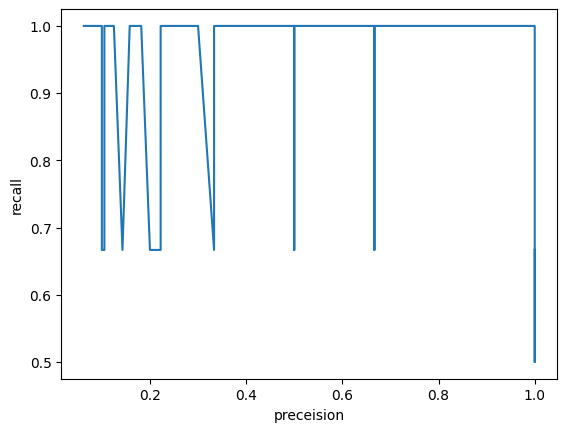

In [101]:
import matplotlib.pyplot as plt

plt.plot(x1,y1)

plt.xlabel('preceision')
plt.ylabel('recall')

plt.show()

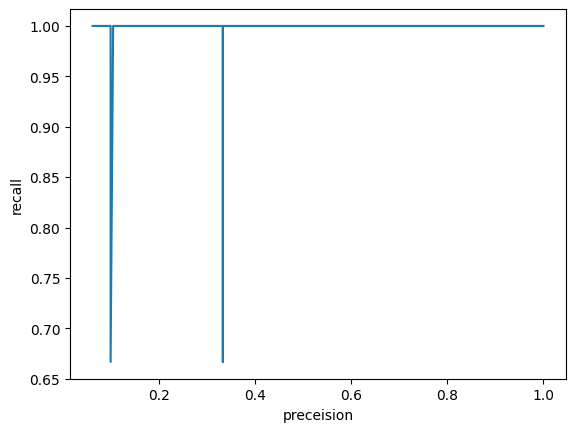

In [102]:
import matplotlib.pyplot as plt

plt.plot(x2,y2)

plt.xlabel('preceision')
plt.ylabel('recall')

plt.show()

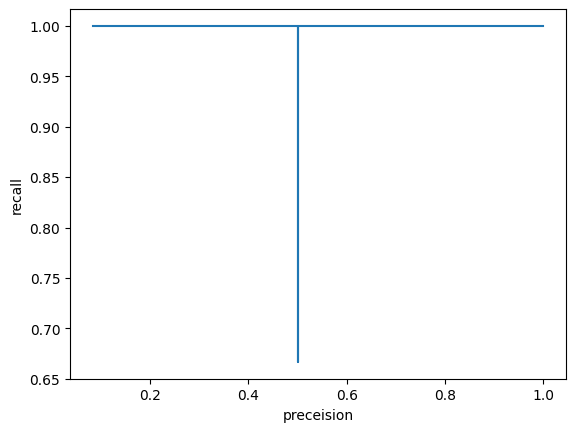

In [103]:
import matplotlib.pyplot as plt

plt.plot(x3,y3)

plt.xlabel('preceision')
plt.ylabel('recall')

plt.show()

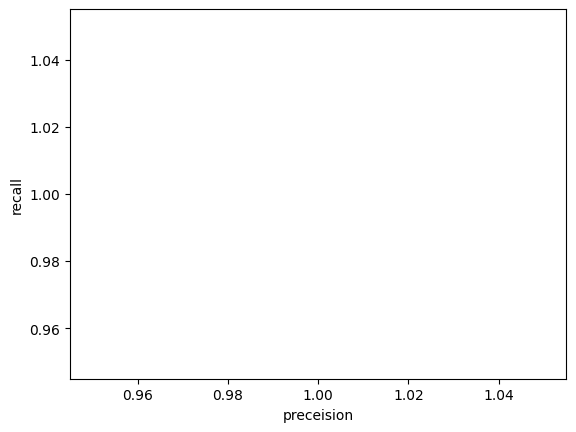

In [104]:
import matplotlib.pyplot as plt

plt.plot(x4,y4)

plt.xlabel('preceision')
plt.ylabel('recall')

plt.show()